In [64]:
import numpy as np
from fitparse import FitFile
import matplotlib.pyplot as plt
fitfile = FitFile('/Users/jasperhajonides/Downloads/10403037425_ACTIVITY.fit')
fitfile.parse()

In [65]:
fitfile.messages

[<DataMessage: file_id (#0) -- local mesg: #0, fields: [serial_number: 3379608681, time_created: 2023-01-29 10:45:48, unknown_7: None, manufacturer: garmin, garmin_product: 3290, number: None, type: activity]>,
 <DataMessage: file_creator (#49) -- local mesg: #1, fields: [unknown_2: None, software_version: 2410, hardware_version: None]>,
 <DataMessage: unknown_288 (#288) -- local mesg: #2, fields: [unknown_253: 1043923548, unknown_2: None, unknown_0: None, unknown_1: None]>,
 <DataMessage: unknown_327 (#327) -- local mesg: #3, fields: [unknown_253: 1043923548, unknown_3: 12, unknown_4: 8352, unknown_5: 4, unknown_0: 9, unknown_1: 1, unknown_2: 1, unknown_6: 0]>,
 <DataMessage: unknown_327 (#327) -- local mesg: #3, fields: [unknown_253: 1043923548, unknown_3: 12, unknown_4: 8352, unknown_5: 4, unknown_0: 9, unknown_1: 1, unknown_2: 1, unknown_6: 0]>,
 <DataMessage: unknown_326 (#326) -- local mesg: #4, fields: [unknown_253: 1043923548, unknown_0: 49, unknown_1: 3]>,
 <DataMessage: event

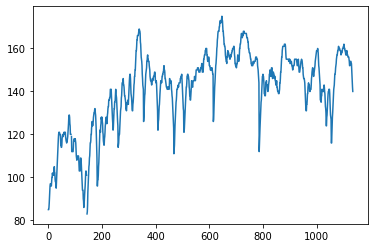

In [57]:
hr = []
for record in fitfile.get_messages('record'):
    for field in record:
#         print("%s: %s" % (field.name, field.value))
        if field.name == 'heart_rate':
            hr.append(field.value)
            
plt.plot(np.array(hr))

In [66]:
import glob

In [71]:
from fitparse import FitFile
for file in glob.glob('/Users/jasperhajonides/Downloads/2023-01-28/*'):
    print(file)
    fitfile = FitFile(file)
    fitfile.parse()
    for record in fitfile.get_messages('record'):
#     if record.type == 'sleep':
        for field in record:
            print("%s: %s" % (field.name, field.value))


/Users/jasperhajonides/Downloads/2023-01-28/172378428011_WELLNESS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172326013080_METRICS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172535790437_WELLNESS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172439680135_WELLNESS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172381732224_HRV_STATUS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172326013483_HRV_STATUS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172381730876_METRICS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172381730386_METRICS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172381733098_SLEEP_DATA.fit
/Users/jasperhajonides/Downloads/2023-01-28/172326012383_WELLNESS.fit
/Users/jasperhajonides/Downloads/2023-01-28/172381729702_WELLNESS.fit


In [52]:


for record in fitfile.get_messages('record'):
#     if record.type == 'sleep':
    for field in record:
        if field.name == 'start_time':
            sleep_start_time = field.value
        elif field.name == 'time_in_bed':
            sleep_time_in_bed = field.value
    print("%s: %s" % (field.name, field.value))


# print("Sleep start time: ", sleep_start_time)
# print("Sleep time in bed: ", sleep_time_in_bed)

In [83]:
import requests
from bs4 import BeautifulSoup

# Step 1: Send a POST request with login credentials to the website's login endpoint
session = requests.Session()
login_url = "https://connect.garmin.com/signin/?service=https%3A%2F%2Fconnect.garmin.com%2Fmodern%2Fdashboard%2F347209"
login_data = {"username": "jasperhajonides@hotmail.com", "password": "Garmin-44"}
session.post(login_url, data=login_data)

# Step 2: Send a request to the website and get the HTML content (using the session object)
url = "https://connect.garmin.com/modern/dashboard/347209"
response = session.get(url)
html_content = response.content

# Step 3: Parse the HTML and extract the data you want
soup = BeautifulSoup(html_content, "html.parser")
data = soup.find_all("p")  # extract all <p> elements

# Step 4: Store the extracted data
for p in data:
    print(p.text)

[]

In [85]:
soup

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><style data-href="/styles.a8465107f99a824f09fa.css">body,html{height:auto;font:400 14px/22px Open Sans,Helvetica Neue,Helvetica,Arial,sans-serif;color:#222;background-color:#efefef;margin:0}a,a:active,a:hover,a:visited{text-decoration:none;color:inherit}#truste-consent-track{display:block}#truste-consent-content{display:flex;align-items:center;justify-content:center;flex-wrap:wrap;width:100%;box-sizing:border-box}#truste-consent-text{margin:0 1rem 0 0;color:#fff;font-size:16px;font-weight:700;font-family:arial}#truste-consent-buttons>a{color:#fff;font-size:14px;margin:12px 10px 10px;text-align:center;text-decoration:underline}#truste-consent-buttons{display:flex;flex-direction:row;margin-top:1px!important;margin-left:10px!important}#truste-consent-buttons #truste-consent-button,#truste-consent-but

In [88]:
pip install selenium

     |████████████████████████████████| 6.3 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 384 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 8.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [89]:
from selenium import webdriver

# Start a new instance of the Firefox driver
driver = webdriver.Firefox()

# Navigate to the login page
login_url = "https://connect.garmin.com/signin/?service=https%3A%2F%2Fconnect.garmin.com%2Fmodern%2Fdashboard%2F347209"

driver.get(login_url)

# Locate the username and password fields by their name attribute
username = driver.find_element_by_name("jasperhajonides@hotmail.com")
password = driver.find_element_by_name("Garmin-44")

# Enter the credentials
username.send_keys("my_username")
password.send_keys("my_password")

# Submit the form
password.submit()

# Close the browser
driver.quit()

SessionNotCreatedException: Message: Expected browser binary location, but unable to find binary in default location, no 'moz:firefoxOptions.binary' capability provided, and no binary flag set on the command line
